# Exploratory Data Analysis

In [2]:
import os
import yaml
import joblib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Configuration File

In [3]:
os.chdir('/home/febbyngrni/telco_churn')
os.getcwd()

'/home/febbyngrni/telco_churn'

In [4]:
params_dir = 'config/config.yaml'

In [5]:
def load_params(params_dir):
    with open(params_dir, 'r') as file:
        params = yaml.safe_load(file)

    return params

In [6]:
params = load_params(params_dir)
params

{'dataset_path': 'data/raw/telco_customer_churn.csv',
 'dataset_cleaned_path': 'data/processed/cleaned_data.pkl',
 'train_set_path': ['data/processed/X_train.pkl',
  'data/processed/y_train.pkl'],
 'valid_set_path': ['data/processed/X_valid.pkl',
  'data/processed/y_valid.pkl'],
 'test_set_path': ['data/processed/X_test.pkl', 'data/processed/y_test.pkl'],
 'data_rus_path': ['data/processed/X_rus.pkl', 'data/processed/y_rus.pkl'],
 'data_ros_path': ['data/processed/X_ros.pkl', 'data/processed/y_ros.pkl'],
 'data_sm_path': ['data/processed/X_sm.pkl', 'data/processed/y_sm.pkl'],
 'valid_feng_set_path': ['data/processed/X_valid_feng.pkl',
  'data/processed/y_valid_feng.pkl'],
 'test_feng_set_path': ['data/processed/X_test_feng.pkl',
  'data/processed/y_test_feng.pkl'],
 'ohe_gender_path': 'models/ohe_gender.pkl',
 'ohe_senior_citizen_path': 'models/ohe_senior_citizen.pkl',
 'ohe_partner_path': 'models/ohe_partner.pkl',
 'ohe_dependents_path': 'models/ohe_dependents.pkl',
 'ohe_phone_servic

## Load Train Set

In [7]:
X_train = joblib.load(params['train_set_path'][0])
y_train = joblib.load(params['train_set_path'][1])

In [8]:
X_train.head()

,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges
5557,Female,No,No,No,5,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,E-Check,80.20,384.25
2270,Female,Yes,No,No,3,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,E-Check,86.85,220.95
6930,Female,No,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Auto Card,75.15,216.75
2257,Female,No,No,No,60,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Auto Card,80.55,4847.05
898,Female,No,No,No,12,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Auto Bank,98.90,1120.95


In [9]:
y_train.head()

5557     No
2270    Yes
6930    Yes
2257     No
898     Yes
Name: churn, dtype: object

In [10]:
train_set = pd.concat([X_train, y_train], axis=1)
train_set.head()

,gender,senior_citizen,partner,dependents,tenure_months,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
5557,Female,No,No,No,5,Yes,No,Fiber optic,No,No,No,No,Yes,No,Month-to-month,No,E-Check,80.20,384.25,No
2270,Female,Yes,No,No,3,Yes,No,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,E-Check,86.85,220.95,Yes
6930,Female,No,Yes,No,3,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Auto Card,75.15,216.75,Yes
2257,Female,No,No,No,60,Yes,Yes,DSL,No,No,Yes,Yes,Yes,Yes,One year,No,Auto Card,80.55,4847.05,No
898,Female,No,No,No,12,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,Month-to-month,Yes,Auto Bank,98.90,1120.95,Yes


## Data Exploration

### Check Statistical Description

In [12]:
train_set.describe()

,tenure_months,monthly_charges,total_charges
count,4930.000000,4930.000000,4930.000000
mean,32.471197,64.950081,2301.797566
std,24.646350,30.243674,2292.566446
min,0.000000,18.400000,0.000000
25%,9.000000,35.500000,396.325000
50%,29.000000,70.575000,1387.400000
75%,56.000000,90.050000,3857.012500
max,72.000000,118.750000,8684.800000


### Label Distribution

In [13]:
train_set['churn'].value_counts(normalize=True)

churn
No     0.734686
Yes    0.265314
Name: proportion, dtype: float64

<Axes: xlabel='churn', ylabel='count'>

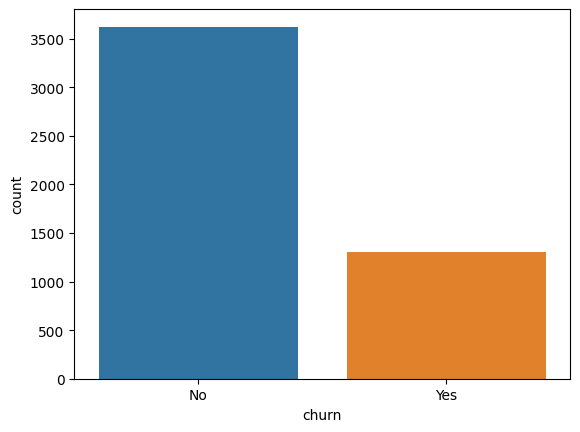

In [14]:
sns.countplot(data=train_set, x='churn', hue='churn')

### Tenure Months Distribution

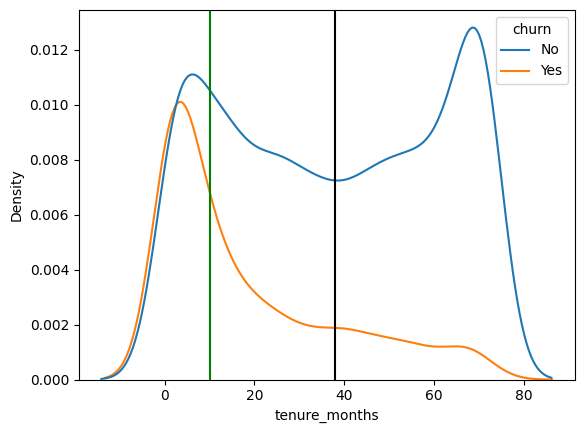

In [15]:
sns.kdeplot(data=train_set, x='tenure_months', hue='churn')
plt.axvline(train_set[train_set['churn'] == 'Yes']['tenure_months'].median(), 0, 1, color = "g")
plt.axvline(train_set[train_set['churn'] == 'No']['tenure_months'].median(), 0, 1, color = "k")

<Axes: xlabel='tenure_months'>

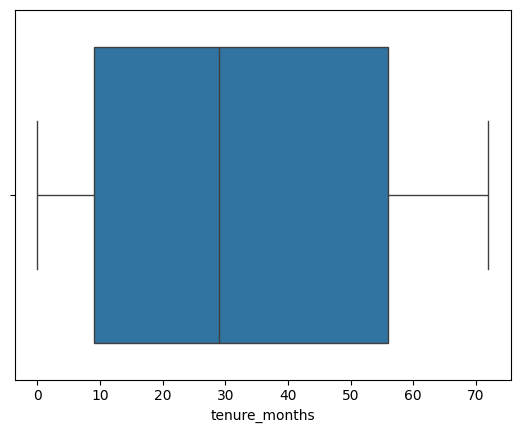

In [16]:
sns.boxplot(data=train_set, x='tenure_months')

### Monthly Charges Distribution

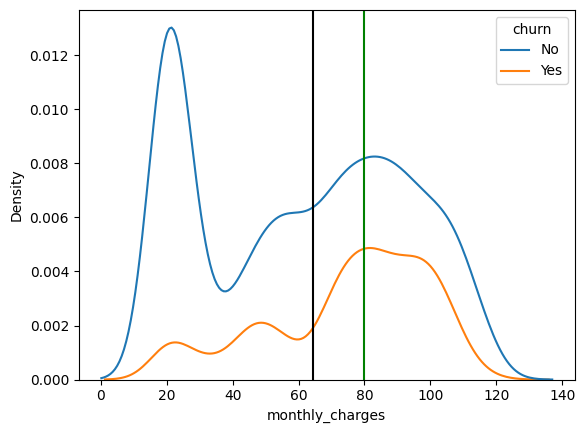

In [17]:
sns.kdeplot(data=train_set, x='monthly_charges', hue='churn')
plt.axvline(train_set[train_set['churn'] == 'Yes']['monthly_charges'].median(), 0, 1, color = "g")
plt.axvline(train_set[train_set['churn'] == 'No']['monthly_charges'].median(), 0, 1, color = "k")

<Axes: xlabel='monthly_charges'>

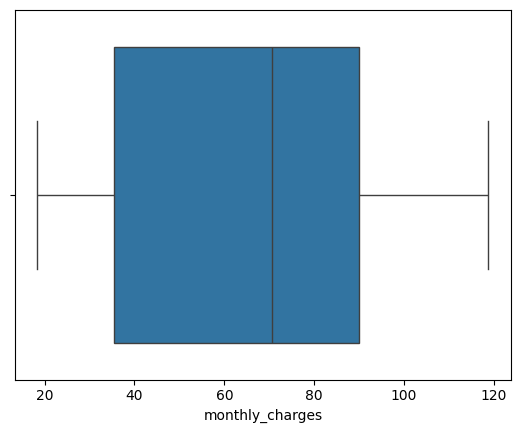

In [18]:
sns.boxplot(data=train_set, x='monthly_charges')

### Total Charges Distribution

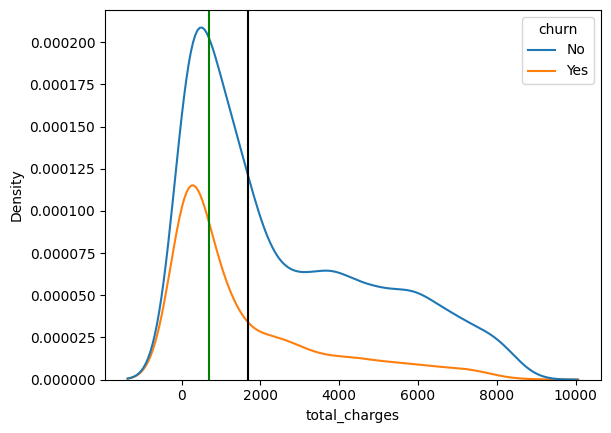

In [19]:
sns.kdeplot(data=train_set, x='total_charges', hue='churn')
plt.axvline(train_set[train_set['churn'] == 'Yes']['total_charges'].median(), 0, 1, color = "g")
plt.axvline(train_set[train_set['churn'] == 'No']['total_charges'].median(), 0, 1, color = "k")

<Axes: xlabel='total_charges'>

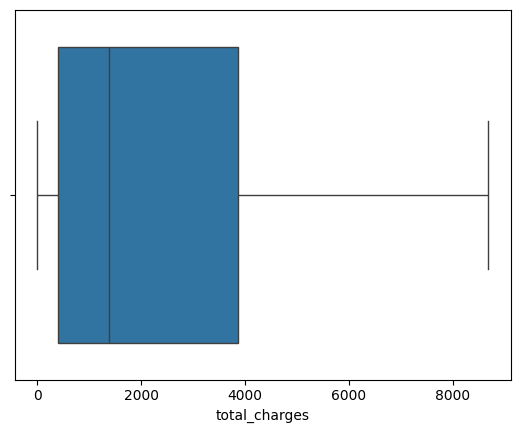

In [20]:
sns.boxplot(data=train_set, x='total_charges')

### Demographical Distribution

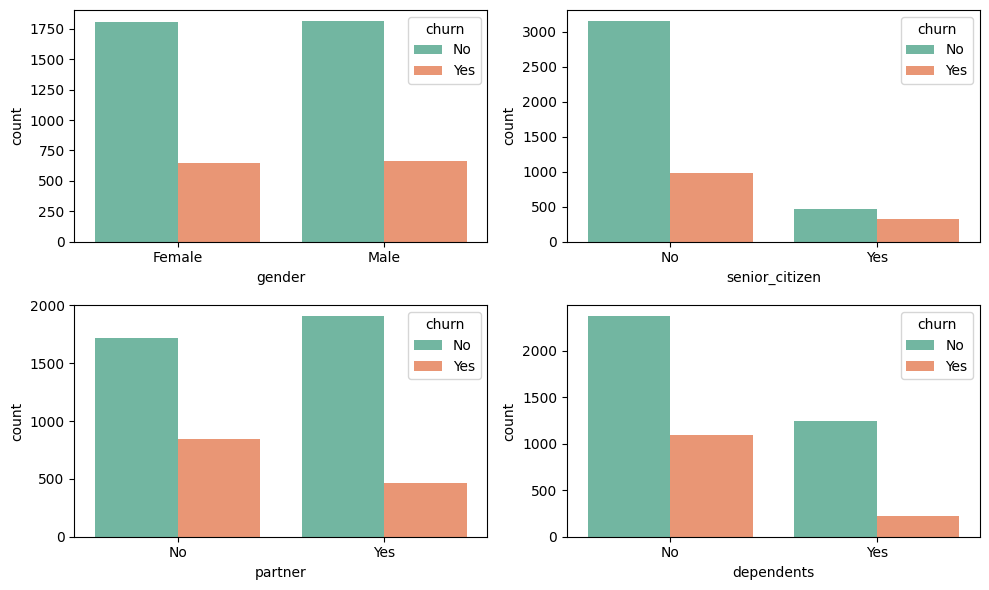

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
ax = ax.flatten()

for i, col in enumerate(params['object_columns'][:4]):
    sns.countplot(data=train_set, x=col, hue='churn', ax=ax[i], palette='Set2')
    ax[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### Services Distribution

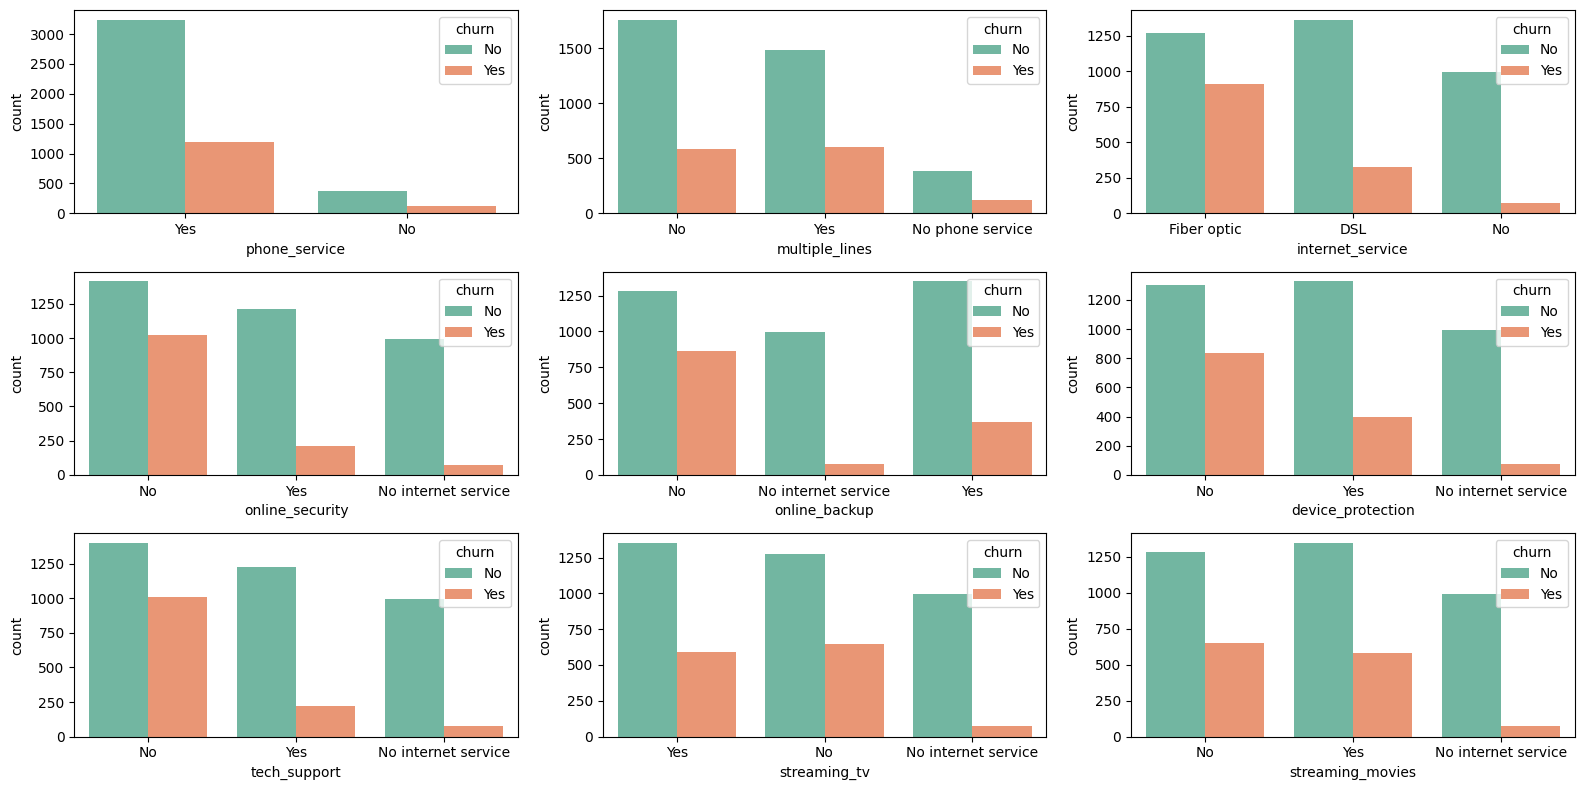

In [22]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(16, 8))
ax = ax.flatten()

for i, col in enumerate(params['object_columns'][4:13]):
    sns.countplot(data=train_set, x=col, hue='churn', ax=ax[i], palette='Set2')
    ax[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### Payment Distribution

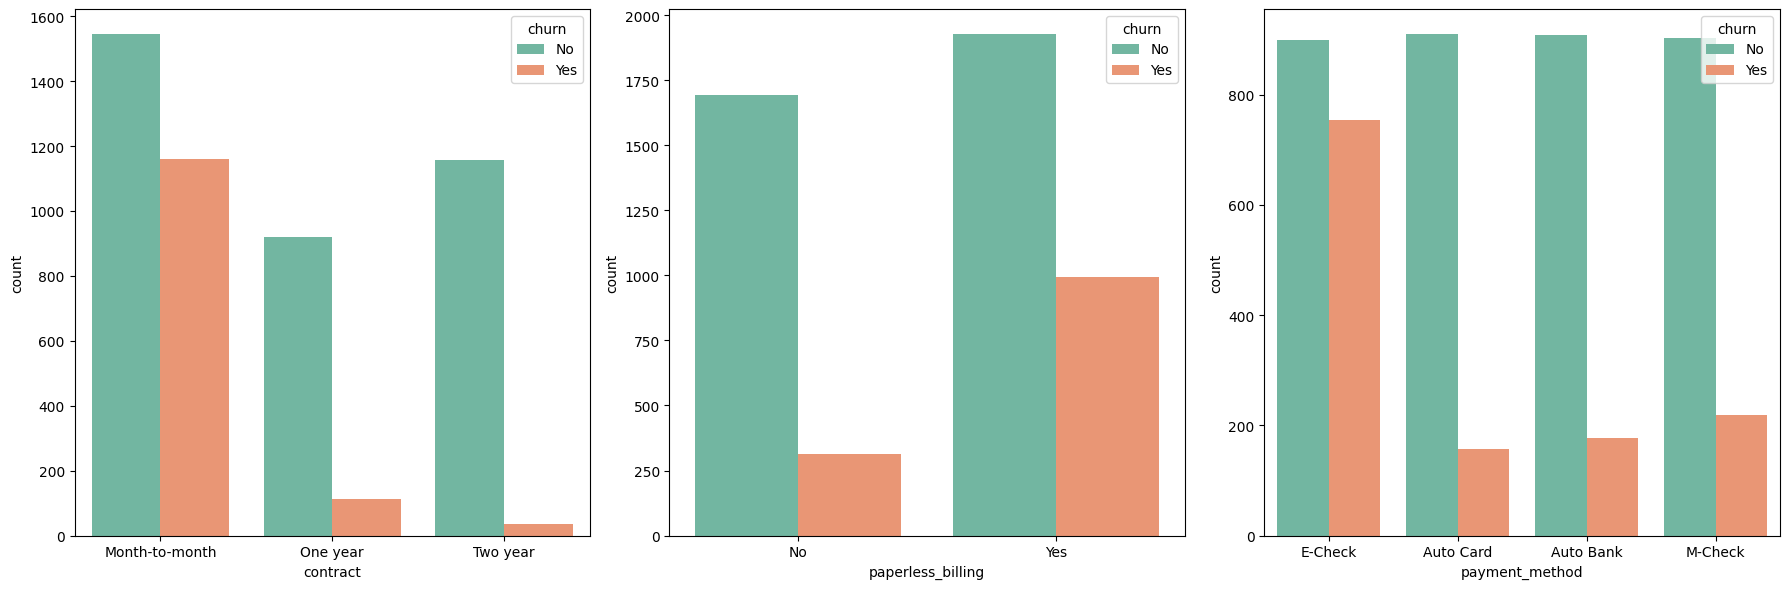

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

for i, col in enumerate(params['object_columns'][13:16]):
    sns.countplot(data=train_set, x=col, hue='churn', ax=ax[i], palette='Set2')
    ax[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### Correlation Test

<Axes: >

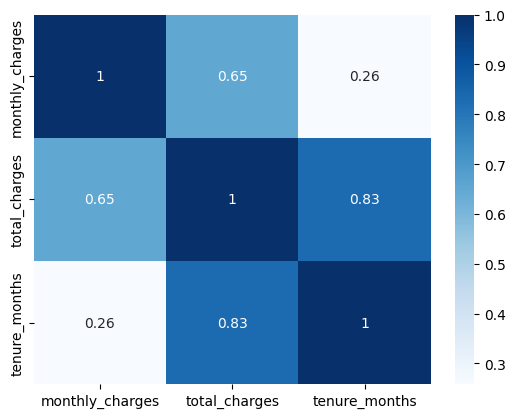

In [24]:
sns.heatmap(train_set[params['float_columns'] + params['int_columns']].corr(), cmap='Blues', annot=True)

### Pairplot

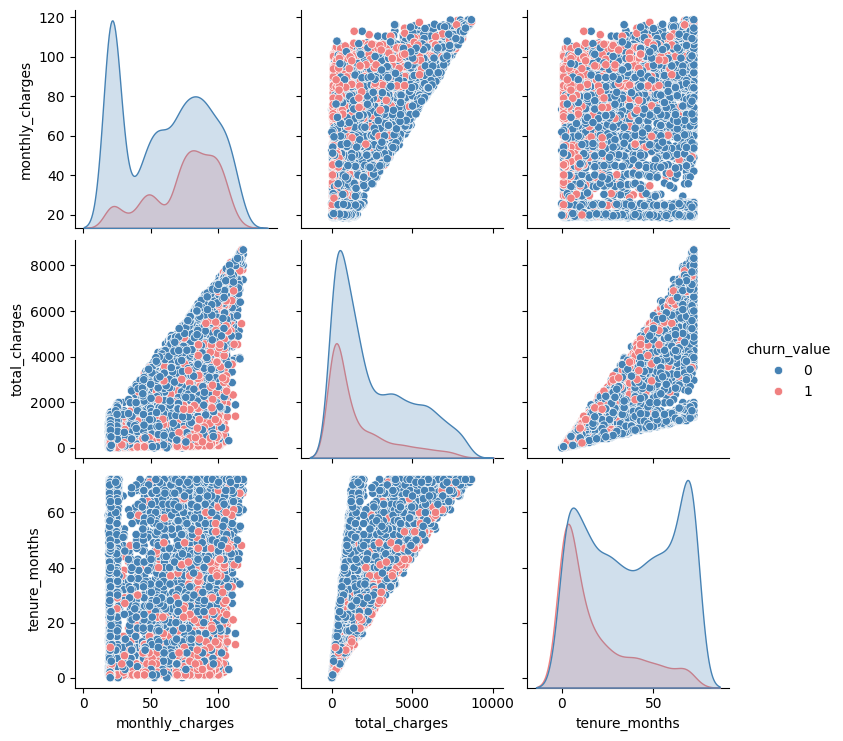

In [25]:
train_set['churn_value'] = train_set['churn'].map({'No' : 0, 'Yes' : 1})
sns.pairplot(data = train_set[params['float_columns'] + params['int_columns'] + ['churn_value']],
             hue = 'churn_value',
             palette={0: 'steelblue', 1: 'lightcoral'},
             diag_kind='kde')